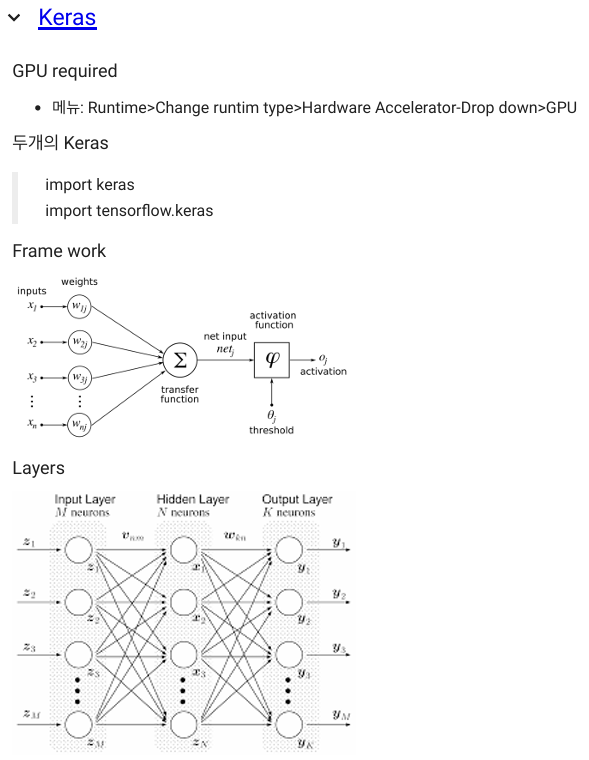

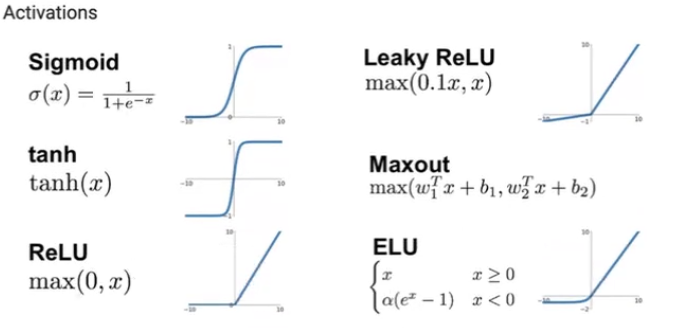

#Basic structure

import keras as kr

model = kr.models.Sequential()

model.compile()

model.summary()

---
prepare data

---



model.fit()

model.evaluate()

In [1]:
import keras as kr

# keras 모델 기본 구조
# input 구조 + 레이어 깊이
model = kr.models.Sequential([kr.layers.Flatten(input_shape=(1,)),
                             kr.layers.Dense((1))
                             ])
# 컴파일 설정 (optimizier, loss function, metrics)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

#weight / threshold
w, b = model.get_weights()
print(w, b)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

[[-0.05592299]] [0.]


In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# model을 먼저 선언하고
model = Sequential()
# 이후 모델에 필요한 내용들 추가
model.add(Flatten(input_shape=(1,)))
model.add(Dense((1)))

# 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

# weight, threshold
w, b = model.get_weights()
print(w, b)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

[[0.8206142]] [0.]


In [6]:
import numpy as np

testData = [[1], [0]]
testAnswer = [1, 0]
# keras 모델에서는 numpy array 혹은 tensor 형태가 필요
testData = np.array(testData)
testAnswer = np.array(testAnswer)

model.evaluate(testData, testAnswer, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 1.0000 - loss: 0.0161


[0.016089629381895065, 1.0]

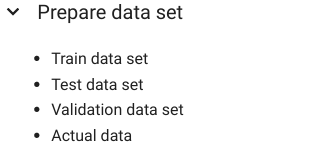

In [7]:
x_train = np.random.random((1000,1))
y_train = 2*x_train + 3 + np.random.random((1000,1))/4.0

# train 데이터 구조 변경
x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)

x_test = np.random.random((100,1))
y_test = 2*x_test + 3 + np.random.random((100,1))/5.0

# test 데이터 구조 변경
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

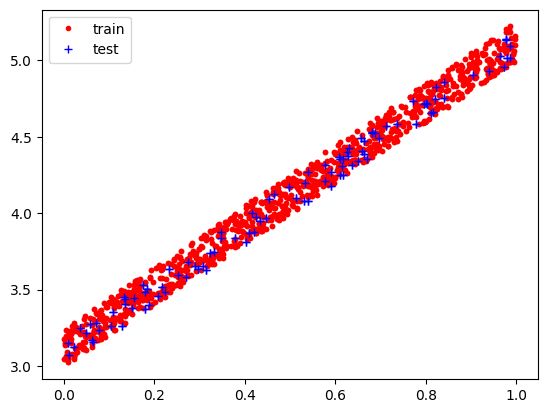

In [8]:
import matplotlib.pyplot as fig
fig.plot(x_train, y_train, 'r.') # train은 빨간색 점
fig.plot(x_test, y_test, 'b+') # test는 파란색 +

# 오른쪽 위에 train, test 레이블 이름 추가mport matplotlib.pyplot as fig
fig.plot(x_train, y_train, 'r.') # train은 빨간색 점
fig.plot(x_test, y_test, 'b+') # test는 파란색 +

# 오른쪽 위에 train, test 레이블 이름 추가
fig.legend(['train', 'test'], loc='upper left')
fig.show()

#Linear regression

In [9]:
# cov -> 가중치를 기반 공분산 행렬 출력 함
# bias 정규, var 배열 변환
w = np.cov(x_train, y_train, bias=1)[0,1]/np.var(x_train)
b = np.average(y_train) - w*np.average(x_train)
print(w, b)

1.9945476521041872 3.12389066625739


In [10]:
# 예측값 가중치 * 테스트값 + Threshold
y_predict = w*x_test + b

# Error는 MSE 사용
# 예측값과 실제 test 값 차이 비교
meanSquaredError = np.square(np.subtract(y_predict, y_test)).mean()
print(meanSquaredError)

0.0037310634654813876


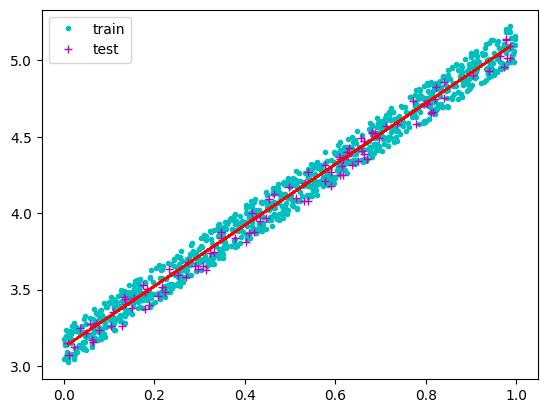

In [11]:
# train, test, 예측값 표시
fig.plot(x_train, y_train, 'c.')
fig.plot(x_test, y_test, 'm+')
fig.plot(x_test, y_predict, 'r') # 빨간선이 예측값
fig.legend(['train', 'test'], loc='upper left')
fig.show()

#Keras

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=(1,)))
model.add(Dense(1))

# 이번엔 optimizer를 rmsprop으로
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# epoch = 250, batch 사이즈 = 64로 학습
logger = model.fit(x_train, y_train, epochs=250, batch_size=64)

w, b = model.get_weights()
print(w, b)

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15.3174   
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2505
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0003  
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8129
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5892  
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.2966 
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.1317 
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9990 
Epoch 9/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.8617 
Epoch 10/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7664 
Epoch 11/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.6412 
Epoch 12/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2962 
Epoch 13/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.9581  
Epoch 14/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.9914  
Epoch 15/250
16/16 ━━━━━━━━━━━━━━━━━━━━

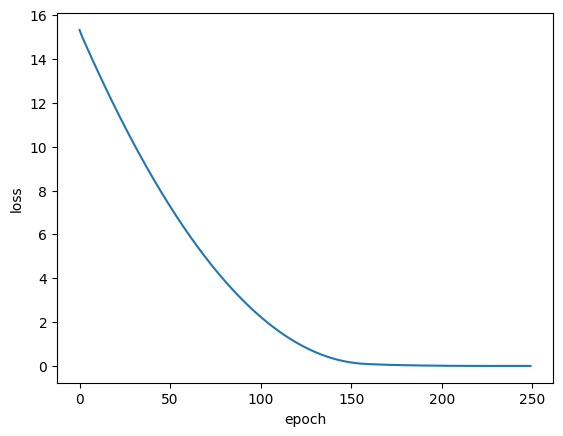

In [14]:
import matplotlib.pyplot as plt
# 위에서 학습한 모델의 loss를 그래프로
plt.plot(logger.history['loss'])
#plt.ylim(0., 1.)

# epoch 증가하면서 -> 학습하면서 loss 변화 관
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [15]:
loss = model.evaluate(x_test, y_test, batch_size=32)
print(loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 
0.003735386533662677


#Model without input layer

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# layer 없이 모델 사용
model = Sequential()
model.add(Dense(1, input_dim=1))

model.compile(optimizer='rmsprop', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
logger = model.fit(x_train, y_train, epochs=250, batch_size=64)
w, b = model.get_weights()
print(w, b)

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.0141  
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.8487 
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.4934 
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6037  
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.2019 
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.7612 
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.9673  
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5710 
Epoch 9/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5138 
Epoch 10/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.4753 
Epoch 11/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.9628 
Epoch 12/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.4500  
Epoch 13/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.4188 
Epoch 14/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.1906 
Epoch 15/250
16/16 ━━━━━━━━━━━━━━━━━━━━

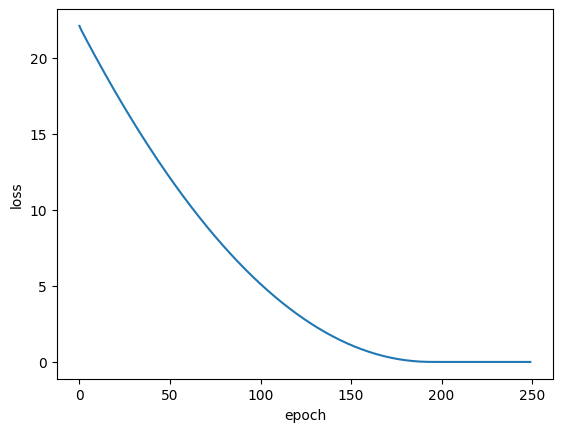

In [18]:
import matplotlib.pyplot as plt
plt.plot(logger.history['loss'])
#plt.ylim(0., 50.)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [19]:
loss = model.evaluate(x_test, y_test, batch_size=32)
print(loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 
0.0037171421572566032


#MultiLayers

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# layer 2개 이상 -> multi layer
model = Sequential()
# 활성함수로 sigmoid 함수 사용
model.add(Dense(2, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# rmsprop, mse 사용해서 컴파일
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
x_train = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y_train = [[0.], [1.], [1.], [0.]]

# keras 모델에서는 numpy array 혹은 tensor 형태가 필요
x_train = np.array(x_train)
y_train = np.array(y_train)

logger = model.fit(x_train, y_train, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3355  
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2498 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1942 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3339 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3324 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2492 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2491 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3391 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3492 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3724 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2489 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2617 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3299 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3372 
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2487 
Epo

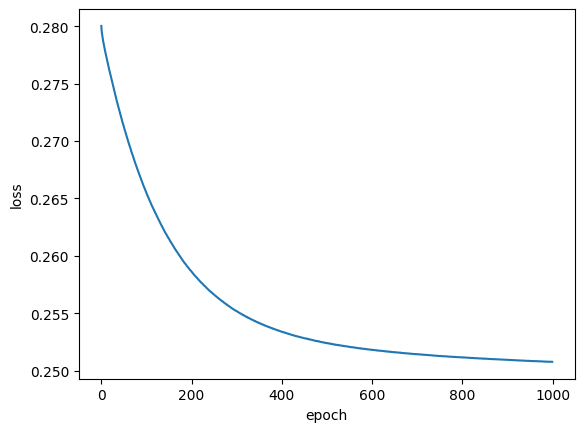

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 0.2504
0.2504386007785797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[0.49436045],
       [0.52639735],
       [0.4561318 ],
       [0.48710385]], dtype=float32)

In [23]:
import matplotlib.pyplot as plt

plt.plot(logger.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

loss = model.evaluate(x_train, y_train, batch_size=32)
print(loss)
model.predict(x_train)

#Time Series with RNN

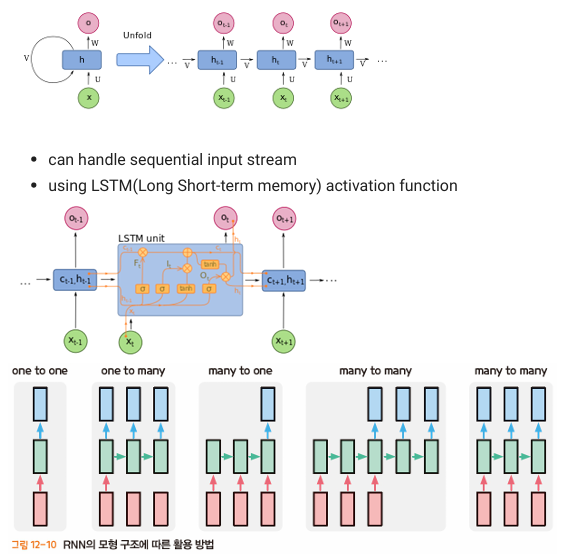

In [24]:
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 119.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 테슬라 종가 데이터셋
tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])

df_tsla = df_tsla.reset_index()
df_tsla.columns = ['date', 'value']
# date 날짜 형태로 변형
df_tsla['date'] = pd.to_datetime(df_tsla['date'])
# date를 기준 인덱스로 설정
df_tsla.set_index('date', inplace=True)
df_tsla.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,value
date,
2021-11-01,402.863342
2021-11-02,390.666656
2021-11-03,404.619995
2021-11-04,409.970001
2021-11-05,407.363342


In [26]:
#df_tsla.reset_index()
#df_tsla.head()
dataset_tsla = df_tsla.values
#dataset_tsla

In [27]:
numTrain = int(0.8*len(dataset_tsla))
numTest = len(dataset_tsla) - numTrain # 뒤 20%를 test 데이터로

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset_tsla)
#scaled_data

In [28]:
x_train_data,y_train_data=[],[]

for i in range(28,numTrain):
  x_train_data.append(scaled_data[i-28:i,0])
  y_train_data.append(scaled_data[i,0])
print(type(x_train_data))
print(type(y_train_data))

<class 'list'>
<class 'list'>


In [29]:
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0],
                                         x_train_data.shape[1],1))

print(type(x_train_data), x_train_data.shape)
print(type(y_train_data), y_train_data.shape)

<class 'numpy.ndarray'> (256, 28, 1)
<class 'numpy.ndarray'> (256,)


In [30]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
lstm_tsla = Sequential()

# lstm 모델로 진행
lstm_tsla.add(LSTM(units=28, return_sequences=True,
                   input_shape=(x_train_data.shape[1], 1)))
lstm_tsla.add(LSTM(units=28))
lstm_tsla.add(Dense(1))

# Error : MSE / optimizer : adam 사용
lstm_tsla.compile(loss='mean_squared_error', optimizer='adam')
lstm_tsla.fit(x_train_data, y_train_data, epochs=50, batch_size=1, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
256/256 - 13s - 50ms/step - loss: 0.0127
Epoch 2/50
256/256 - 11s - 42ms/step - loss: 0.0065
Epoch 3/50
256/256 - 7s - 29ms/step - loss: 0.0056
Epoch 4/50
256/256 - 3s - 12ms/step - loss: 0.0040
Epoch 5/50
256/256 - 3s - 13ms/step - loss: 0.0039
Epoch 6/50
256/256 - 4s - 14ms/step - loss: 0.0030
Epoch 7/50
256/256 - 4s - 17ms/step - loss: 0.0029
Epoch 8/50
256/256 - 7s - 26ms/step - loss: 0.0034
Epoch 9/50
256/256 - 3s - 12ms/step - loss: 0.0029
Epoch 10/50
256/256 - 6s - 23ms/step - loss: 0.0029
Epoch 11/50
256/256 - 5s - 20ms/step - loss: 0.0025
Epoch 12/50
256/256 - 4s - 17ms/step - loss: 0.0022
Epoch 13/50
256/256 - 6s - 25ms/step - loss: 0.0023
Epoch 14/50
256/256 - 6s - 24ms/step - loss: 0.0021
Epoch 15/50
256/256 - 4s - 17ms/step - loss: 0.0022
Epoch 16/50
256/256 - 7s - 26ms/step - loss: 0.0022
Epoch 17/50
256/256 - 3s - 12ms/step - loss: 0.0020
Epoch 18/50
256/256 - 8s - 33ms/step - loss: 0.0018
Epoch 19/50
256/256 - 7s - 27ms/step - loss: 0.0019
Epoch 20/50
256/256

In [31]:
print(numTrain, numTest, (len(df_tsla) - numTest -28), len(df_tsla))

284 71 256 355


In [32]:
x_test_data = []

# 이전에 한 것처럼 하나씩 추가하며 진행
for i in range(numTest):
  x_test_data.append(scaled_data[numTrain+i-28:numTrain+i,0])

print(type(x_test_data))
x_test_data = np.array(x_test_data) # array 형태로 변형
x_test_data = np.reshape(x_test_data, (x_test_data.shape[0], # 형태 변경
                                         x_test_data.shape[1],1))

predicted_value = lstm_tsla.predict(x_test_data) # x_test_data를 통해 lstm 모델로 예측
predicted_value = scaler.inverse_transform(predicted_value)

<class 'list'>
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step


<ipython-input-33-d90884df8396>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tsla_test_vis['Predictions'] = predicted_value # lstm 모델로 예측한 값


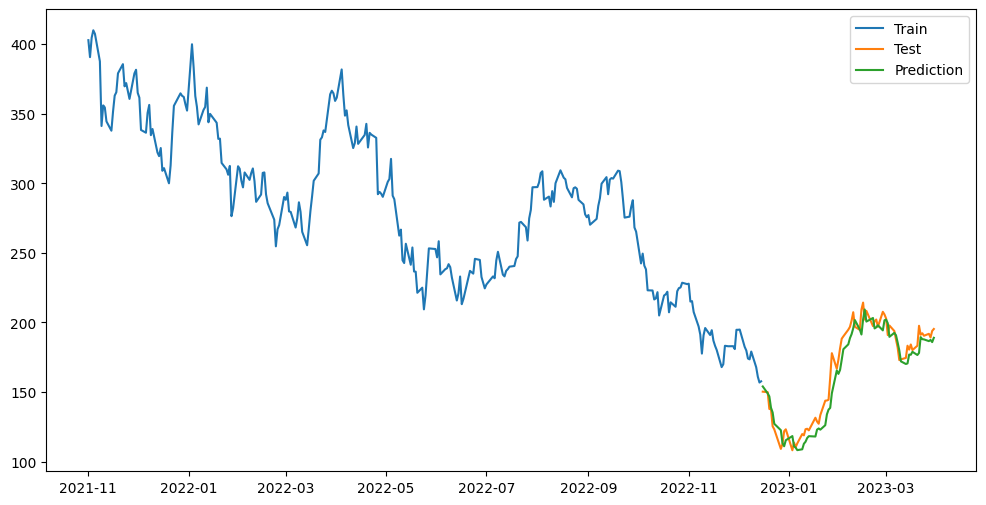

In [33]:
df_tsla_train_vis = tsla[:284] # 284까지의 데이터로 train
df_tsla_test_vis = tsla[284:] # 이후 test

df_tsla_test_vis['Predictions'] = predicted_value # lstm 모델로 예측한 값

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(df_tsla_train_vis["Close"], label='Train') # Train 데이터셋으로 실제 종가 그리기
plt.plot(df_tsla_test_vis[['Close',"Predictions"]], label=['Test', 'Prediction']) # 284 이후, Test와 예측값 모두 표시
plt.legend()
plt.show()